<a href="https://colab.research.google.com/github/Abdullah-AlOwais/Tuwaiq/blob/main/Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Tuwaiq/Week 4/4- Deep learning/1-Weekly Task/Datasets/Traffic_Accidents.csv")

In [ ]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,2901,6,...,-1,0,2,2,0,4,1,2.0,1,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1057,1,...,6,0,2,2,2,1,0,1.0,1,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,1476,4,...,3,4055,2,2,4,1,0,1.0,1,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,1901,7,...,6,0,2,2,4,5,5,1.0,1,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,610,3,...,-1,0,2,2,4,1,0,1.0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,3265,6,...,6,6485,2,3,4,1,0,1.0,1,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,799,4,...,-1,0,2,2,0,1,0,2.0,1,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,95,3,...,6,0,2,2,4,5,5,1.0,1,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,2327,6,...,5,81,2,2,4,5,5,1.0,1,2011


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [ ]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [ ]:
df.sample(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
38523,452110.0,338090.0,-1.226089,52.937663,31,3.0,1,1.0,12/01/2007,6,...,4,6006,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2007
193,552230.0,214880.0,0.206903,51.811780,42,3.0,2,1.0,01/09/2012,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2012
45108,447980.0,365490.0,-1.283461,53.184334,30,3.0,3,2.0,09/06/2010,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fog or mist,Wet/Damp,2.0,Yes,2010
15651,527258.0,410414.0,-0.079514,53.574884,16,2.0,2,1.0,18/02/2013,2,...,3,180,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
44067,386660.0,342810.0,-2.200151,52.982444,21,3.0,2,3.0,16/06/2012,7,...,3,500,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2012
45249,427190.0,587760.0,-1.574535,55.183412,10,3.0,2,1.0,24/02/2007,7,...,6,6510,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,No,2007
37311,436060.0,337770.0,-1.464925,52.936102,30,3.0,3,2.0,16/01/2006,2,...,5,353,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2006
1043,445380.0,290480.0,-1.332784,52.510299,33,3.0,1,1.0,25/01/2011,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2.0,Yes,2011
47012,623570.0,312550.0,1.304817,52.664499,36,2.0,3,1.0,12/05/2005,5,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
4287,487362.0,149031.0,-0.750081,51.233728,44,3.0,2,1.0,26/09/2012,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2012


In [ ]:
df.describe()
#only numeric fields are returned.

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [ ]:
df.describe(exclude=[np.number])
#Exclude numeric fields.

,Date,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident
count,52000,52000,52000,52000,52000,51456,52000,52000,52000
unique,3286,206,6,3,6,5,9,6,2
top,04/11/2005,E10000016,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes
freq,43,1465,38852,51718,43368,37734,41662,35727,42143


In [ ]:
df.duplicated().sum()

43

In [ ]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:

#df[i].isnull() -> to check if there any 'null' value'
#replace the Null and then replace it with the mode
for i in df.columns:
      print('The null Value in (',i,') is = ',df[i].isnull().sum())
      df[i].fillna(df[i].mode()[0],inplace=True)
      print(i,' mode= ',df[i].mode()[0])
      print('The null Value in (',i,') after filling is = ',df[i].isnull().sum())
      print('\n----------------------------------------------\n')

The null Value in ( Location_Easting_OSGR ) is =  0
Location_Easting_OSGR  mode=  531890.0
The null Value in ( Location_Easting_OSGR ) after filling is =  0

----------------------------------------------

The null Value in ( Location_Northing_OSGR ) is =  0
Location_Northing_OSGR  mode=  181190.0
The null Value in ( Location_Northing_OSGR ) after filling is =  0

----------------------------------------------

The null Value in ( Longitude ) is =  0
Longitude  mode=  -0.10061
The null Value in ( Longitude ) after filling is =  0

----------------------------------------------

The null Value in ( Latitude ) is =  0
Latitude  mode=  51.515721
The null Value in ( Latitude ) after filling is =  0

----------------------------------------------

The null Value in ( Police_Force ) is =  0
Police_Force  mode=  1
The null Value in ( Police_Force ) after filling is =  0

----------------------------------------------

The null Value in ( Accident_Severity ) is =  322
Accident_Severity  mode= 

In [ ]:
le = LabelEncoder()
df['Date'] = le.fit_transform(df['Date'])
df['Did_Police_Officer_Attend_Scene_of_Accident'] = le.fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])
df['Road_Surface_Conditions'] = le.fit_transform(df['Road_Surface_Conditions'])
df['Weather_Conditions'] = le.fit_transform(df['Weather_Conditions'])
df['Light_Conditions'] = le.fit_transform(df['Light_Conditions'])
df['Pedestrian_Crossing-Physical_Facilities'] = le.fit_transform(df['Pedestrian_Crossing-Physical_Facilities'])
df['Pedestrian_Crossing-Human_Control'] = le.fit_transform(df['Pedestrian_Crossing-Human_Control'])
df['Local_Authority_(Highway)'] = le.fit_transform(df['Local_Authority_(Highway)'])
df['Road_Type'] = le.fit_transform(df['Road_Type'])



In [ ]:
scaler = StandardScaler()
std=scaler.fit_transform(df)
pca = PCA().fit_transform(std)

Text(0, 0.5, 'cumulative explained variance')

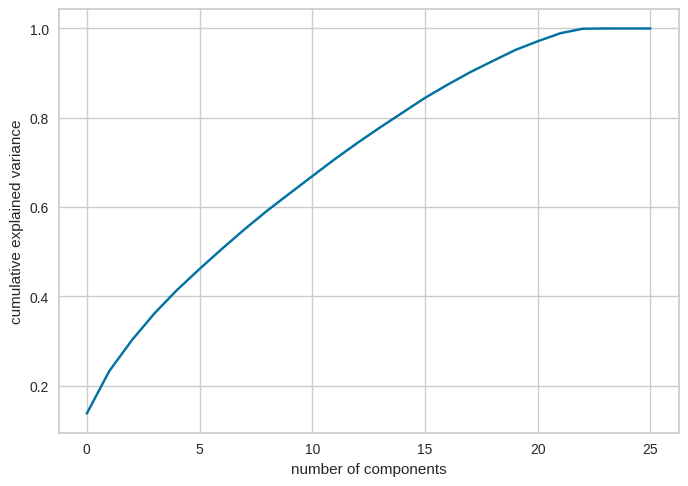

In [ ]:
pca = PCA().fit(std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
n_components = 15
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(std)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


<Axes: >

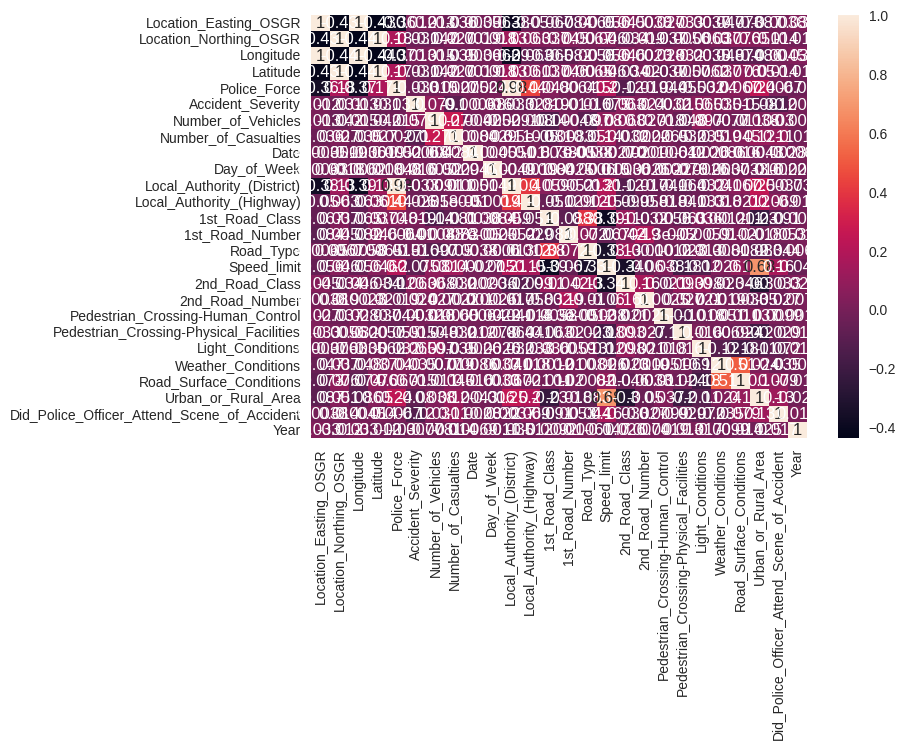

In [ ]:
plt.figure()
corr=df.corr()
sns.heatmap(data=corr,annot=True)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

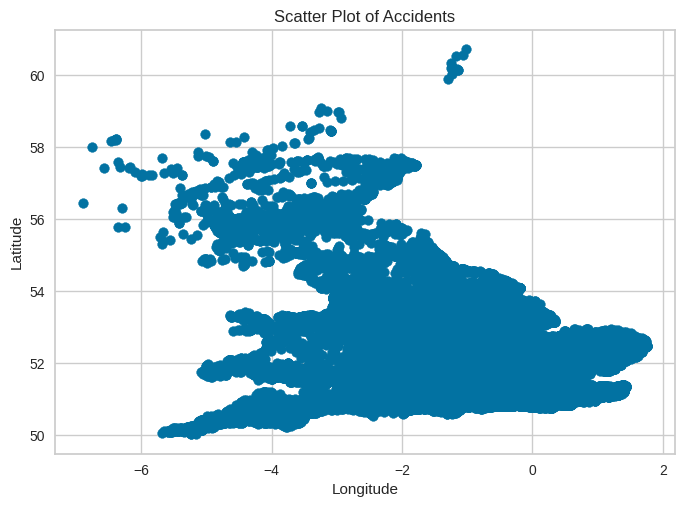

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Accidents")
plt.show()


## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

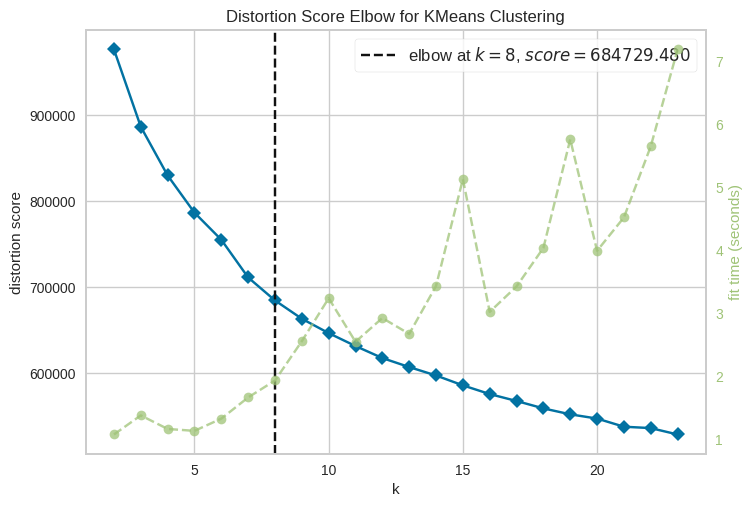

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,24))
visualizer.fit(pca_result)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=8, n_init="auto", random_state=2030).fit(pca_result)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
k = 8

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((pca_result.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters


{0: {'center': array([ 0.06919154,  1.78785042,  1.06183904, -0.87041662, -1.11581855,
          0.74488834, -1.33144319, -0.43023013,  0.47220939, -0.35227962,
         -1.99014048,  1.53612873,  1.53979015, -0.79836124,  0.35832746]),
  'points': []},
 1: {'center': array([ 1.91370766,  1.38037529, -1.73969824, -0.82102214, -0.84826224,
          1.28986536,  0.50473215, -1.55808914, -1.99788476,  1.76866493,
         -1.43399697, -0.3136139 , -0.61404224,  1.47914034, -0.28559275]),
  'points': []},
 2: {'center': array([ 1.31500594,  0.87140735, -1.52309322,  0.38553669, -1.48097481,
         -1.68986363,  1.32482102, -0.14245754, -1.35195008,  0.19190117,
          0.35394329,  1.09445268,  0.62338183,  0.23082704, -1.28701093]),
  'points': []},
 3: {'center': array([-1.03766588,  0.02421853, -0.4130172 , -0.06777926,  1.82295936,
          1.60640877,  0.02303729,  1.28280594,  1.3108637 , -1.07266661,
         -1.68377805, -0.13694829,  1.51590323, -1.40998777, -1.07499478]),
 

<ipython-input-289-bc1377979e6c>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:,0], pca_result[:,1],cmap='viridis')


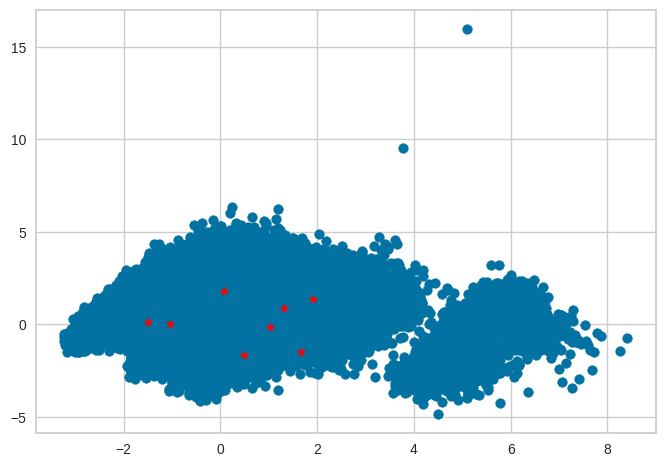

In [ ]:
plt.scatter(pca_result[:,0], pca_result[:,1],cmap='viridis')
plt.grid(True)

for i, cluster in clusters.items():
    center = cluster['center']
    plt.scatter(center[0], center[1], marker='*', c='red', label=f'Center {i}')

plt.show()


In [ ]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred



In [ ]:
clusters = assign_clusters(pca_result,clusters)
clusters = update_clusters(pca_result,clusters)
pred = pred_cluster(pca_result,clusters)


## Plot the data points with their predicted cluster center

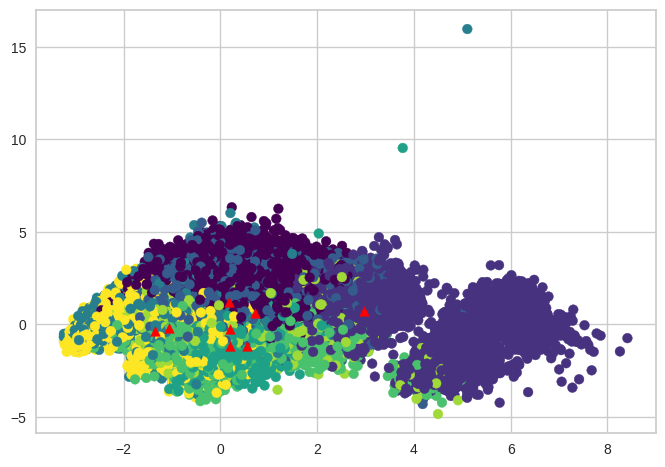

In [ ]:
plt.scatter(pca_result[:,0],pca_result[:,1],c = pred,cmap='viridis')
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red',)
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

- i didn't choose any feature
- i did elbow plot method and that shows that 8 is the best
